# CSE6207: Data Analytics Group M2
##### This Notebook will filter the LIWC from the CSV file created in the previous notebook
---

**Group members**


1. Farhan Mohd. Fokrul Alam
2. Siraj Uz Salehin
3. Jasrin Shiddike
4. Shahinur Islam


### library import

In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

### import CSV file

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PSS/Stress Prediction M2-20210521T093603Z-001/Stress Prediction M2/liwc_dataframe.csv')
df.head()

,pss_score,pss_stress_level,user,help,office,dance,money,wedding,domestic_work,sleep,medical_emergency,cold,hate,cheerfulness,aggression,occupation,envy,anticipation,family,vacation,crime,attractive,masculine,prison,health,pride,dispute,nervousness,government,weakness,horror,swearing_terms,leisure,suffering,royalty,wealthy,tourism,furniture,school,magic,...,car,strength,technology,breaking,shape_and_size,power,white_collar_job,animal,party,terrorism,smell,disappointment,poor,plant,pain,beauty,timidity,philosophy,negotiate,negative_emotion,cleaning,messaging,competing,law,friends,payment,achievement,alcohol,liquid,feminine,weapon,children,monster,ocean,giving,contentment,writing,rural,positive_emotion,musical
0,14,moderate,Subject_0,0.00000,0.000000,0.0,0.00000,0.30000,0.0,0.000000,0.0,0.0,0.0,0.15,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.30000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.15,0.00000
1,15,moderate,Subject_1,0.00641,0.003205,0.0,0.00641,0.00641,0.0,0.003205,0.0,0.0,0.0,0.00,0.0,0.003205,0.0,0.0,0.003205,0.003205,0.00641,0.0,0.003205,0.003205,0.0,0.0,0.003205,0.0,0.003205,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003205,0.003205,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.003205,0.003205,0.0,0.00641,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003205,0.003205,0.003205,0.012821,0.0,0.0,0.003205,0.003205,0.00641,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003205,0.0,0.0,0.0,0.00,0.00641
2,15,moderate,Subject_2,0.00641,0.003205,0.0,0.00641,0.00641,0.0,0.003205,0.0,0.0,0.0,0.00,0.0,0.003205,0.0,0.0,0.003205,0.003205,0.00641,0.0,0.003205,0.003205,0.0,0.0,0.003205,0.0,0.003205,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003205,0.003205,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.003205,0.003205,0.0,0.00641,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003205,0.003205,0.003205,0.012821,0.0,0.0,0.003205,0.003205,0.00641,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003205,0.0,0.0,0.0,0.00,0.00641
3,21,moderate,Subject_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23,moderate,Subject_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Clean dataframe: remove rows with NaN

In [ ]:
df = df.dropna(subset=['emotional'])
df.drop(['pss_stress_level', 'user'], axis=1, inplace=True)

df

,pss_score,help,office,dance,money,wedding,domestic_work,sleep,medical_emergency,cold,hate,cheerfulness,aggression,occupation,envy,anticipation,family,vacation,crime,attractive,masculine,prison,health,pride,dispute,nervousness,government,weakness,horror,swearing_terms,leisure,suffering,royalty,wealthy,tourism,furniture,school,magic,beach,journalism,...,car,strength,technology,breaking,shape_and_size,power,white_collar_job,animal,party,terrorism,smell,disappointment,poor,plant,pain,beauty,timidity,philosophy,negotiate,negative_emotion,cleaning,messaging,competing,law,friends,payment,achievement,alcohol,liquid,feminine,weapon,children,monster,ocean,giving,contentment,writing,rural,positive_emotion,musical
0,14,0.000000,0.000000,0.000000,0.000000,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.150000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.150000,0.000000
1,15,0.006410,0.003205,0.000000,0.006410,0.006410,0.000000,0.003205,0.000000,0.000000,0.000000,0.000000,0.000000,0.003205,0.000000,0.000000,0.003205,0.003205,0.006410,0.000000,0.003205,0.003205,0.000000,0.000000,0.003205,0.000000,0.003205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003205,0.003205,0.000000,0.000000,0.003205,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.003205,0.003205,0.000000,0.006410,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003205,0.003205,0.003205,0.012821,0.000000,0.000000,0.003205,0.003205,0.006410,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003205,0.000000,0.000000,0.000000,0.000000,0.006410
2,15,0.006410,0.003205,0.000000,0.006410,0.006410,0.000000,0.003205,0.000000,0.000000,0.000000,0.000000,0.000000,0.003205,0.000000,0.000000,0.003205,0.003205,0.006410,0.000000,0.003205,0.003205,0.000000,0.000000,0.003205,0.000000,0.003205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003205,0.003205,0.000000,0.000000,0.003205,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.003205,0.003205,0.000000,0.006410,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003205,0.003205,0.003205,0.012821,0.000000,0.000000,0.003205,0.003205,0.006410,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003205,0.000000,0.000000,0.000000,0.000000,0.006410
5,22,0.000000,0.001449,0.002899,0.001449,0.007246,0.001449,0.000000,0.002899,0.001449,0.001449,0.001449,0.000000,0.002899,0.000000,0.000000,0.002899,0.001449,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002899,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001449,0.000000,0.008696,0.000000,0.000000,0.000000,0.001449,0.000000,0.002899,0.000000,0.000000,0.000000,0.000000,0.002899,0.001449,0.002899,0.001449,0.000000,0.002899,0.001449,0.001449,0.000000,0.000000,0.000000,0.000000,0.002899,0.000000,0.000000,0.020290,0.000000,0.000000,0.001449,0.001449,0.000000
6,20,0.000000,0.000000,0.000000,0.007874,0.003937,0.000000,0.000000,0.000000,0.000000,0.000000,0.007874,0.000000,0.000000,0.000000,0.000000,0.007874,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.

## Filter methods

In [ ]:
# correlation=df.corr()
# plt.figure(figsize=(200,100))
# sns.heatmap(correlation, annot=True)

In [ ]:
from scipy.stats import pearsonr
import numpy as np
rho = df.corr()
pval = df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
a = rho.round(2).astype(str) + p
# rho.to_csv('rho.csv')
a.to_csv('rho.csv')
a

,pss_score,help,office,dance,money,wedding,domestic_work,sleep,medical_emergency,cold,hate,cheerfulness,aggression,occupation,envy,anticipation,family,vacation,crime,attractive,masculine,prison,health,pride,dispute,nervousness,government,weakness,horror,swearing_terms,leisure,suffering,royalty,wealthy,tourism,furniture,school,magic,beach,journalism,...,car,strength,technology,breaking,shape_and_size,power,white_collar_job,animal,party,terrorism,smell,disappointment,poor,plant,pain,beauty,timidity,philosophy,negotiate,negative_emotion,cleaning,messaging,competing,law,friends,payment,achievement,alcohol,liquid,feminine,weapon,children,monster,ocean,giving,contentment,writing,rural,positive_emotion,musical
pss_score,1.0***,-0.71**,0.1,0.59*,-0.27,-0.21,0.22,-0.18,-0.25,-0.16,0.34,-0.18,0.34,0.32,0.17,0.19,0.2,0.13,-0.14,0.47,0.04,-0.08,0.34,-0.56*,-0.07,0.51,-0.12,-0.19,0.21,0.42,0.24,0.69**,0.46,-0.56*,0.03,0.01,0.36,0.21,-0.2,-0.6*,...,-0.2,-0.34,0.23,0.51,0.01,-0.38,0.25,0.02,-0.21,0.48,0.51,0.51,0.58*,-0.22,0.56*,-0.08,0.51,0.51,-0.26,0.27,0.24,-0.36,0.28,0.43,-0.11,-0.2,0.02,0.51,-0.09,-0.26,0.51,0.28,0.51,0.51,0.32,0.29,-0.21,0.44,-0.22,0.09
help,-0.71**,1.0***,-0.06,-0.37,-0.09,-0.21,-0.31,0.32,-0.01,-0.21,-0.23,-0.26,-0.19,-0.04,-0.18,-0.19,-0.28,-0.04,0.23,-0.28,0.23,0.13,-0.26,0.87***,0.3,-0.05,0.42,-0.19,-0.19,-0.19,-0.19,-0.35,-0.19,0.87***,0.15,0.14,-0.08,-0.19,0.32,0.88***,...,-0.19,0.65**,-0.11,-0.05,-0.25,0.75***,0.01,-0.28,-0.21,-0.19,-0.05,-0.05,-0.28,-0.18,-0.27,-0.26,-0.05,-0.05,-0.13,0.22,-0.02,0.6*,-0.37,-0.19,0.31,-0.19,-0.18,-0.05,-0.27,0.46,-0.05,-0.52*,-0.05,-0.05,-0.16,-0.27,0.47,-0.19,-0.21,0.09
office,0.1,-0.06,1.0***,-0.04,-0.33,-0.18,-0.29,-0.08,-0.3,-0.25,0.85***,-0.12,0.82***,0.18,0.92***,0.92***,0.02,0.12,0.02,0.04,-0.15,0.1,0.13,-0.05,-0.1,-0.14,-0.16,-0.23,0.91***,0.71**,0.18,0.31,-0.16,-0.05,-0.14,0.35,0.01,0.91***,-0.07,-0.04,...,-0.23,0.46,0.89***,-0.14,-0.29,0.28,0.23,-0.1,-0.15,-0.16,-0.14,-0.14,-0.23,-0.22,0.36,0.14,-0.14,-0.14,-0.21,0.42,-0.18,0.67**,-0.45,-0.15,0.18,-0.07,-0.38,-0.14,-0.07,-0.22,-0.14,-0.13,-0.14,-0.14,-0.03,0.26,0.1,-0.18,-0.04,0.05
dance,0.59*,-0.37,-0.04,1.0***,-0.27,-0.2,0.35,-0.32,-0.02,-0.17,-0.12,-0.18,-0.18,0.2,-0.22,-0.22,0.61**,0.47,-0.06,0.83***,-0.11,0.15,0.79***,-0.21,-0.3,0.06,0.17,-0.22,-0.21,-0.15,0.6*,0.43,0.52,-0.21,0.06,-0.23,0.59*,-0.21,-0.33,-0.21,...,-0.22,-0.3,0.1,0.06,-0.04,-0.36,0.09,0.18,-0.19,0.51,0.06,0.06,0.69**,-0.22,0.21,-0.29,0.06,0.06,-0.26,-0.06,0.36,-0.27,-0.07,0.52,0.47,-0.27,-0.05,0.06,0.16,-0.32,0.06,0.24,0.06,0.06,0.49,-0.31,0.32,0.41,-0.19,0.26
money,-0.27,-0.09,-0.33,-0.27,1.0***,-0.26,0.5,0.03,0.81***,0.91***,-0.33,-0.26,-0.29,-0.27,-0.26,-0.26,0.3,-0.11,-0.01,-0.17,-0.04,-0.03,-0.14,-0.13,-0.0,-0.14,-0.12,0.93***,-0.27,-0.3,-0.11,-0.4,-0.14,-0.13,-0.04,-0.14,-0.21,-0.27,0.03,-0.12,...,0.93***,-0.27,-0.35,-0.14,0.85***,-0.22,-0.23,0.72**,-0.28,-0.14,-0.14,-0.14,-0.25,0.94***,-0.37,0.79***,-0.14,-0.14,0.97***,-0.39,-0.11,-0.3,0.71**,-0.13,-0.21,0.94***,0.84***,-0.14,0.76***,-0.02,-0.14,0.65**,-0.14,-0.14,-0.08,-0.07,-0.18,-0.23,-0.28,-0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
contentment,0.29,-0.27,0.26,-0.31,-0.07,-0.16,-0.27,-0.24,-0.3,-0.18,0.39,-0.1,0.41,-0.22,0.42,0.42,-0.07,-0.31,-0.3,-0.23,-0.29,-0.31,-0.22,-0.15,-0.23,0.04,-0.35,-0.16,0.42,0.38,-0.15,0.07,-0.15,-0.15,-0.31,-0.08,-0.17,0.42,-0.24,-0.16,...,-0.16,0.11,0.27,0.04,-0.2,-0.18,-0.18,-0.23,-0.15,-0.15,0.04,0.04,-0.23,-0.16,0.14,0.02,0.04,0.04,0.07,0.43,-0.32,-0.08,0.32,-0.15,-0.16,0.09,-0.18,0.04,-0.24,0.57*,0.04,0.3,0.04,0.04,-0.29,1.0***,-0.23,-0.14,-0.12,-0.34
writing,-0.21,0.47,0.1,0.32,-0.18,-0.19,-0.29,-0.24,-0.09,-0.19,-0.16,-0.19,-0.1,-0.49,-0.17,-0.16,0.5,0.5,0.05,0.45

### find which variables are most closely correlated to pss_score

In [ ]:
df.corr()['pss_score'].sort_values()

help         -0.711636
fashion      -0.609400
journalism   -0.598435
pride        -0.563099
wealthy      -0.563099
                ...   
poor          0.579459
dance         0.585825
reading       0.597864
suffering     0.687226
pss_score     1.000000
Name: pss_score, Length: 195, dtype: float64

In [ ]:
df_new = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PSS/Stress Prediction M2-20210521T093603Z-001/Stress Prediction M2/selected_features.csv')
df_new.head()

,pss_score,help,dance,pride,suffering,wealthy,journalism,blue_collar_job,reading,anonymity,war,fashion,poor,pain
0,14,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000
1,15,0.00641,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.003205,0.00641,0.000000,0.000000
2,15,0.00641,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.003205,0.00641,0.000000,0.000000
3,22,0.00000,0.002899,0.0,0.002899,0.0,0.0,0.001449,0.0,0.001449,0.000000,0.00000,0.001449,0.002899
4,20,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000


In [ ]:
Z = df_new[['help', 'pride', 'suffering', 'journalism','blue_collar_job','reading','anonymity','war','poor','pain']]
lm = LinearRegression()
lm.fit(Z, df_new['pss_score'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('the Intercept is ', lm.intercept_)

the Intercept is  15.999999999999996


In [ ]:
print('the coefficients are', lm.coef_)

the coefficients are [   33.14974961   216.80952689  1323.00059203  -352.32951916
   817.3782607   1059.9999735  -1909.59960341  -378.29951918
   915.62183232   835.29893605]


In [ ]:
print('The R-square is: ', lm.score(Z, df['pss_score']))

The R-square is:  0.9165613147914032


### Training & testing

In [ ]:
y_data = df_new['pss_score']
x_data = Z

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)

In [ ]:
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 2
number of training samples: 9


In [ ]:
lre=LinearRegression()
lre.fit(x_train, y_train)
print('R squared training',lre.score(x_train, y_train))
print('R squared testing',lre.score(x_test, y_test))

R squared training 0.9083969465648855
R squared testing 0.8284106992207585


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


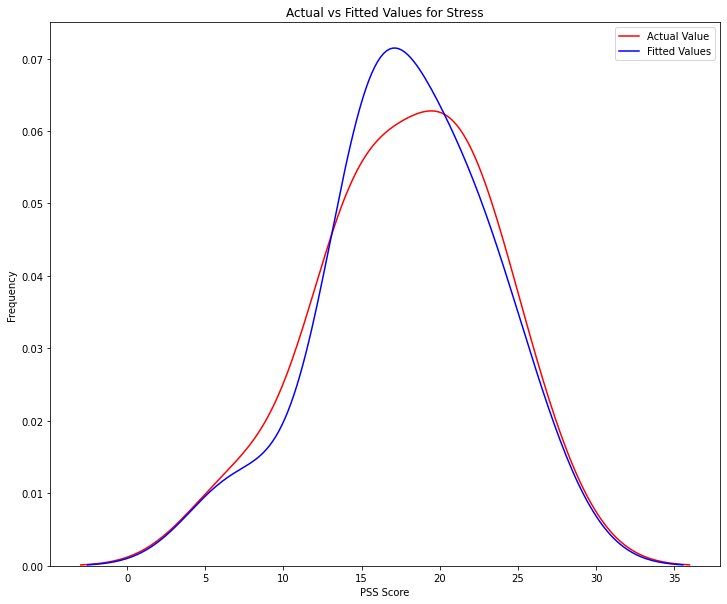

In [ ]:
Y_hat = lm.predict(Z)
width = 12
height = 10

plt.figure(figsize=(width, height))
ax1 = sns.distplot(df_new['pss_score'], hist=False, color="r", label="Actual Value")
ax2 = sns.distplot(lass, hist=False, color="b", label="Predicted Values" , ax=ax1)
#putting labels inside the plot box
plt.legend(labels=['Actual Value', 'Fitted Values'])
plt.title('Actual vs Fitted Values for Stress')
plt.xlabel('PSS Score')
plt.ylabel('Frequency')

plt.show()
plt.close()